<a href="https://colab.research.google.com/github/CyrilleMesue/datascienceprojects.github.io/blob/main/Drug_Discovery_Part_1_(Data_Collection_and_Pre_Processing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computational Drug Discovery [Part 1] Download Bioactivity Data**

Cyrille Mesue NJUME

Adapted from, Chanin Nantasenamat [*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

---

## **ChEMBL Database**

The [*ChEMBL Database*](https://www.ebi.ac.uk/chembl/) is a database that contains curated bioactivity data of more than 2 million compounds. It is compiled from more than 76,000 documents, 1.2 million assays and the data spans 13,000 targets and 1,800 cells and 33,000 indications.
[Data as of March 25, 2020; ChEMBL version 26].

## **Installing libraries**

Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.

In [1]:
! pip install chembl_webresource_client

     |████████████████████████████████| 55 kB 2.1 MB/s 
     |████████████████████████████████| 596 kB 16.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.0.1 which is incompatible.


## **Importing libraries**

In [91]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from chembl_webresource_client.new_client import new_client

## **Search for Target protein**

### **Target search for cancer**

In [54]:
# Target search for cancer
target = new_client.target
target_query = target.search('cancer')
targets = pd.DataFrame.from_dict(target_query)
targets[0:20]

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Cancer-related nucleoside-triphosphatase,14.0,False,CHEMBL4295936,"[{'accession': 'Q9BSD7', 'component_descriptio...",SINGLE PROTEIN,9606.0
1,"[{'xref_id': 'P38398', 'xref_name': None, 'xre...",Homo sapiens,Breast cancer type 1 susceptibility protein,12.0,False,CHEMBL5990,"[{'accession': 'P38398', 'component_descriptio...",SINGLE PROTEIN,9606.0
2,[],None,cancer cell lines,11.0,False,CHEMBL614375,[],CELL-LINE,NaN
3,"[{'xref_id': 'O14519', 'xref_name': None, 'xre...",Homo sapiens,Cyclin-dependent kinase 2-associated protein 1,11.0,False,CHEMBL5578,"[{'accession': 'O14519', 'component_descriptio...",SINGLE PROTEIN,9606.0
4,[],Homo sapiens,Ovarian cancer G-protein coupled receptor 1,11.0,False,CHEMBL3713916,"[{'accession': 'Q15743', 'component_descriptio...",SINGLE PROTEIN,9606.0
5,[],Mus musculus,Ovarian cancer G-protein coupled receptor 1,11.0,False,CHEMBL4523380,"[{'accession': 'Q8BFQ3', 'component_descriptio...",SINGLE PROTEIN,10090.0
6,[],Homo sapiens,Spindlin-1,11.0,False,CHEMBL4523509,"[{'accession': 'Q9Y657', 'component_descriptio...",SINGLE PROTEIN,9606.0
7,[],None,cancer cell lines (55),10.0,False,CHEMBL614376,[],CELL-LINE,NaN
8,[],Homo sapiens,Breast cancer cell lines,10.0,False,CHEMBL614788,[],CELL-LINE,9606.0
9,[],Homo sapiens,Colon cancer cell line,10.0,False,CHEMBL612260,[],CELL-LINE,9606.0


### **Select and retrieve bioactivity data for *Ovarian Cancer cell line in Homo sapiens (humans)* (twelveth entry)**

We will assign the twelveth entry (which corresponds to the target
, *Ovarian cancer cell line*) to the ***pref_name*** variable 

In [55]:
selected_target = targets.target_chembl_id[11]
selected_target

'CHEMBL613895'

Here, we will retrieve only bioactivity data for *Ovarian Cancer cell line* (CHEMBL613895) that are reported as IC$_{50}$ values in nM (nanomolar) unit.

In [57]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [58]:
df = pd.DataFrame.from_dict(res)

In [60]:
df.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,305216,[],CHEMBL695495,Cytotoxicity in non-NTR-expressing human ovari...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,None,None,CHEMBL1145792,J. Med. Chem.,2003,None,CHEMBL84463,None,CHEMBL84463,7.21,False,http://www.openphacts.org/units/Nanomolar,146608,=,1,True,=,None,IC50,nM,None,62.0,CHEMBL613895,Homo sapiens,Ovarian cancer cell line,9606,None,None,IC50,nM,UO_0000065,None,62.0
1,None,307822,[],CHEMBL695495,Cytotoxicity in non-NTR-expressing human ovari...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,NC(=O)c1cc(N2CC2)c([N+](=O)[O-])cc1[N+](=O)[O-],Outside typical range,Values for this activity type are unusually la...,CHEMBL1145792,J. Med. Chem.,2003,None,CHEMBL23330,TRETAZICAR,CHEMBL23330,None,False,http://www.openphacts.org/units/Nanomolar,146596,=,1,True,=,None,IC50,nM,None,174000.0,CHEMBL613895,Homo sapiens,Ovarian cancer cell line,9606,None,None,IC50,nM,UO_0000065,None,174000.0
2,None,310484,[],CHEMBL695495,Cytotoxicity in non-NTR-expressing human ovari...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,None,None,CHEMBL1145792,J. Med. Chem.,2003,None,CHEMBL311087,None,CHEMBL311087,6.84,False,http://www.openphacts.org/units/Nanomolar,146604,=,1,True,=,None,IC50,nM,None,145.0,CHEMBL613895,Homo sapiens,Ovarian cancer cell line,9606,None,None,IC50,nM,UO_0000065,None,145.0
3,None,315699,[],CHEMBL695495,Cytotoxicity in non-NTR-expressing human ovari...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,CNc1cc2c(c3ccccc13)C(CCl)CN2C(=O)c1cc2cc(OC)c(...,None,None,CHEMBL1145792,J. Med. Chem.,2003,None,CHEMBL288377,None,CHEMBL288377,9.70,False,http://www.openphacts.org/units/Nanomolar,146606,=,1,True,=,None,IC50,nM,None,0.2,CHEMBL613895,Homo sapiens,Ovarian cancer cell line,9606,None,None,IC50,nM,UO_0000065,None,0.2
4,None,315708,[],CHEMBL695495,Cytotoxicity in non-NTR-expressing human ovari...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,None,None,CHEMBL1145792,J. Med. Chem.,2003,None,CHEMBL78019,None,CHEMBL78019,6.65,False,http://www.openphacts.org/units/Nanomolar,146605,=,1,True,=,None,IC50,nM,None,224.0,CHEMBL613895,Homo sapiens,Ovarian cancer cell line,9606,None,None,IC50,nM,UO_0000065,None,224.0


In [61]:
df.standard_type.unique()

array(['IC50'], dtype=object)

Finally we will save the resulting bioactivity data to a CSV file **bioactivity_data.csv**.

In [62]:
df.to_csv('bioactivity_data.csv', index=False)

## **Copying files to Google Drive**

Firstly, we need to mount the Google Drive into Colab so that we can have access to our Google adrive from within Colab.

In [15]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


Next, we create a **data** folder in our **Colab Notebooks** folder on Google Drive.

In [16]:
! mkdir "/content/gdrive/My Drive/Colab Notebooks/data"

In [17]:
! cp bioactivity_data.csv "/content/gdrive/My Drive/Colab Notebooks/data"

In [63]:
! ls -l "/content/gdrive/My Drive/Colab Notebooks/data"

total 16
-rw------- 1 root root 15903 Oct 21 19:50 bioactivity_data.csv


Let's see the CSV files that we have so far.

In [64]:
! ls

bioactivity_data.csv  gdrive  sample_data


Taking a glimpse of the **bioactivity_data.csv** file that we've just created.

In [65]:
! head bioactivity_data.csv

activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,305216,[],CHEMBL695495,Cytotoxicity in non-NTR-expressing human ovarian carcinoma cell line (SKOV).,F,,,BAO_0000190,BAO_0000219,cell-based format,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([N+](=O)[O-])cc3)c3ccccc43)[nH]c2c(OC)c1OC,,,CHEMBL1145792,J. Med. Chem.,2003,,CHEMBL84463,,CHEMBL84463,7.21,False,http://www.open

## **Handling missing data**
If any compounds has missing value for the **standard_value** column then drop it

In [72]:
df2 = df[df.standard_value.notna()]
df2[:3]

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,305216,[],CHEMBL695495,Cytotoxicity in non-NTR-expressing human ovari...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,None,None,CHEMBL1145792,J. Med. Chem.,2003,None,CHEMBL84463,None,CHEMBL84463,7.21,False,http://www.openphacts.org/units/Nanomolar,146608,=,1,True,=,None,IC50,nM,None,62.0,CHEMBL613895,Homo sapiens,Ovarian cancer cell line,9606,None,None,IC50,nM,UO_0000065,None,62.0
1,None,307822,[],CHEMBL695495,Cytotoxicity in non-NTR-expressing human ovari...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,NC(=O)c1cc(N2CC2)c([N+](=O)[O-])cc1[N+](=O)[O-],Outside typical range,Values for this activity type are unusually la...,CHEMBL1145792,J. Med. Chem.,2003,None,CHEMBL23330,TRETAZICAR,CHEMBL23330,None,False,http://www.openphacts.org/units/Nanomolar,146596,=,1,True,=,None,IC50,nM,None,174000.0,CHEMBL613895,Homo sapiens,Ovarian cancer cell line,9606,None,None,IC50,nM,UO_0000065,None,174000.0
2,None,310484,[],CHEMBL695495,Cytotoxicity in non-NTR-expressing human ovari...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,None,None,CHEMBL1145792,J. Med. Chem.,2003,None,CHEMBL311087,None,CHEMBL311087,6.84,False,http://www.openphacts.org/units/Nanomolar,146604,=,1,True,=,None,IC50,nM,None,145.0,CHEMBL613895,Homo sapiens,Ovarian cancer cell line,9606,None,None,IC50,nM,UO_0000065,None,145.0


### Print the number of data entries 

In [69]:
print("Total number of data entries : ", len(df))
print("Toal number entries with no missing data : ",len(df2))

Total number of data entries :  33
Toal number entries with no missing data :  30


Apparently, for this dataset there are three(3) entries with missing data. We can just ignore them and use the full 30 entries

In [94]:
x = df2["value"].to_numpy()
x2 = [float(x[i]) for i in range(len(x))]
np.expand_dims(x2,1);

### Vizualising the values

(array([28.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.00000000e-02, 1.74000090e+04, 3.48000080e+04, 5.22000070e+04,
        6.96000060e+04, 8.70000050e+04, 1.04400004e+05, 1.21800003e+05,
        1.39200002e+05, 1.56600001e+05, 1.74000000e+05]),
 <a list of 10 Patch objects>)

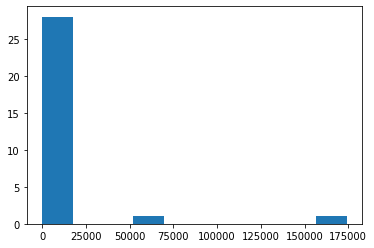

In [95]:
plt.hist(x2)

It can be seen that a great majority of entries have values less than 25000 while only a few(about 2 or 3) have large values.

## **Data pre-processing of the bioactivity data**

### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**. 

In [96]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

### **Iterate the *molecule_chembl_id* to a list**

In [84]:
mol_cid = []
for i in df2.molecule_chembl_id:
  mol_cid.append(i)

### **Iterate *canonical_smiles* to a list**

In [97]:
canonical_smiles = []
for i in df2.canonical_smiles:
  canonical_smiles.append(i)

### **Iterate *standard_value* to a list**

In [98]:
standard_value = []
for i in df2.standard_value:
  standard_value.append(i)

### **Combine the 4 lists into a dataframe**

In [99]:
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
df3 = pd.DataFrame( data_tuples,  columns=['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value'])

In [100]:
df3

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL84463,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,active,62.0
1,CHEMBL23330,NC(=O)c1cc(N2CC2)c([N+](=O)[O-])cc1[N+](=O)[O-],inactive,174000.0
2,CHEMBL311087,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,active,145.0
3,CHEMBL288377,CNc1cc2c(c3ccccc13)C(CCl)CN2C(=O)c1cc2cc(OC)c(...,active,0.2
4,CHEMBL78019,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,active,224.0
5,CHEMBL314246,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,active,114.0
6,CHEMBL316382,COc1cc([N+](=O)[O-])ccc1COC(=O)Nc1cc2c(c3ccccc...,active,59.0
7,CHEMBL314247,COCCOc1cc([N+](=O)[O-])ccc1COC(=O)Nc1cc2c(c3cc...,active,106.0
8,CHEMBL79354,COc1cc2cc(C(=O)N3CC(CCl)c4c3cc(NC(=O)OCc3ccc([...,active,189.0
9,CHEMBL83545,COc1cc([N+](=O)[O-])ccc1COC(=O)Nc1ccc(COC(=O)N...,active,223.0


#### Saves dataframe to CSV file

In [103]:
df3.to_csv('bioactivity_preprocessed_data_ovarian_cancer_target.csv', index=False)

In [104]:
! ls -l

total 28
-rw-r--r-- 1 root root 15903 Oct 21 20:07 bioactivity_data.csv
-rw-r--r-- 1 root root  2745 Oct 21 20:41 bioactivity_preprocessed_data_ovarian_cancer_target.csv
drwx------ 5 root root  4096 Oct 21 19:49 gdrive
drwxr-xr-x 1 root root  4096 Oct  8 13:45 sample_data


Let's copy to the Google Drive

In [109]:
! cp bioactivity_preprocessed_data_ovarian_cancer_target.csv "/content/gdrive/MyDrive/Bioinformatics/data"
! cp bioactivity_preprocessed_data_ovarian_cancer_target.csv "/content/gdrive/My Drive/Colab Notebooks/data"


In [110]:
! ls "/content/gdrive/My Drive/Colab Notebooks/data"

bioactivity_data.csv  bioactivity_preprocessed_data_ovarian_cancer_target.csv


---